In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("Initial Data :\n")
df=pd.read_csv("/content/Fraud.csv")
print("Initial Data :\n")
print(df.head())
df.drop(["nameOrig", "nameDest", "isFlaggedFraud", "step"], axis=1, inplace=True)
df.dropna(axis=0, inplace=True)
df['balanceChangeOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceChangeDest'] = df['newbalanceDest'] - df['oldbalanceDest']
df['isZeroBalanceOrig'] = (df['oldbalanceOrg'] == 0) & (df['newbalanceOrig'] == 0)
df['isZeroBalanceDest'] = (df['oldbalanceDest'] == 0) & (df['newbalanceDest'] == 0)
df['netChange'] = df['balanceChangeDest'] - df['balanceChangeOrig']

print("\nProcessed Data with New Features :\n")
print(df.head())

Initial Data :

Initial Data :

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  

Processed Data with New Features :

       type    amount  oldbalanceOrg

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for cols in ["type","isZeroBalanceOrig","isZeroBalanceDest"]:
  df[cols]=le.fit_transform(df[cols])
print(df.head())

   type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     3   9839.64       170136.0       160296.36             0.0   
1     3   1864.28        21249.0        19384.72             0.0   
2     4    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     3  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  balanceChangeOrig  balanceChangeDest  \
0             0.0      0.0            9839.64                0.0   
1             0.0      0.0            1864.28                0.0   
2             0.0      1.0             181.00                0.0   
3             0.0      1.0             181.00           -21182.0   
4             0.0      0.0           11668.14                0.0   

   isZeroBalanceOrig  isZeroBalanceDest  netChange  
0                  0                  1   -9839.64  
1                  0                  1   -1864.28  
2                  0   

                       type    amount  oldbalanceOrg  newbalanceOrig  \
type               1.000000  0.086940      -0.339244       -0.351744   
amount             0.086940  1.000000      -0.006991       -0.009234   
oldbalanceOrg     -0.339244 -0.006991       1.000000        0.999120   
newbalanceOrig    -0.351744 -0.009234       0.999120        1.000000   
oldbalanceDest    -0.106484  0.336058       0.067858        0.069339   
newbalanceDest    -0.056048  0.515228       0.040882        0.040751   
isFraud            0.016155  0.051428       0.005680       -0.007329   
balanceChangeOrig  0.384264  0.053560      -0.265421       -0.305623   
balanceChangeDest  0.161215  0.846650      -0.082045       -0.087934   
isZeroBalanceOrig  0.223305  0.041343      -0.202655       -0.205323   
isZeroBalanceDest  0.606521 -0.183664      -0.198842       -0.200704   
netChange          0.106122  0.849503      -0.043617       -0.043601   

                   oldbalanceDest  newbalanceDest   isFraud  \


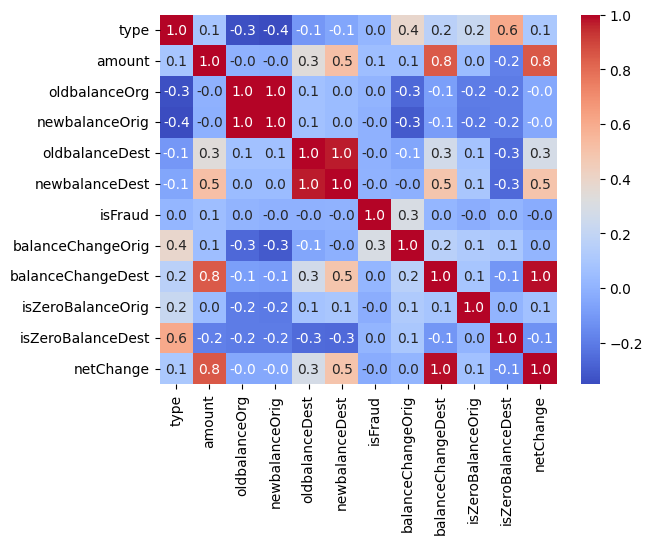

In [ ]:
corr=df.corr()
print(corr)
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt='1.1f')
plt.show()

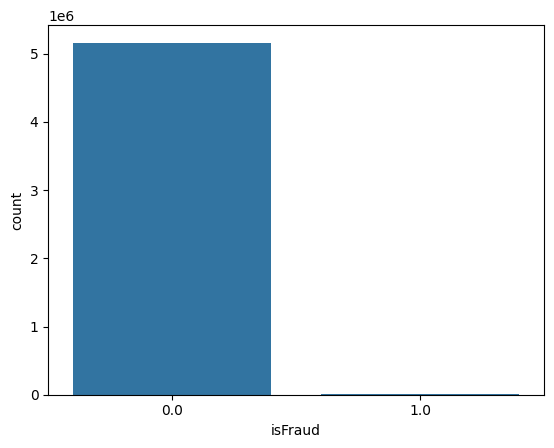

In [ ]:
sns.countplot(x="isFraud",data=df)
plt.show()

In [ ]:
x=df.drop("isFraud",axis=1)
y=df["isFraud"]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_standardized=sc.fit_transform(x)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
sm=RandomUnderSampler()
x_resampled,y_resampled=sm.fit_resample(x_standardized,y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr=LogisticRegression()
rf=RandomForestClassifier()
svm=SVC()
dt=DecisionTreeClassifier()
xgb=xgb.XGBClassifier()
lgb=lgb.LGBMClassifier()
for model in [lr,rf,svm,dt,xgb,lgb]:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(model)
  print(accuracy_score(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))


LogisticRegression()
0.931077694235589
[[768  43]
 [ 67 718]]
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93       811
         1.0       0.94      0.91      0.93       785

    accuracy                           0.93      1596
   macro avg       0.93      0.93      0.93      1596
weighted avg       0.93      0.93      0.93      1596

RandomForestClassifier()
0.9906015037593985
[[807   4]
 [ 11 774]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       811
         1.0       0.99      0.99      0.99       785

    accuracy                           0.99      1596
   macro avg       0.99      0.99      0.99      1596
weighted avg       0.99      0.99      0.99      1596

SVC()
0.8959899749373433
[[779  32]
 [134 651]]
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90       811
         1.0       0.95      0.83      0.89       785

    a

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={
    "n_estimators":[100,200,300],
    "max_depth":[10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}
gridsearch=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)
gridsearch.fit(x_train,y_train)
print(gridsearch.best_params_)
print(gridsearch.best_score_)
print(gridsearch.best_estimator_)
print(gridsearch.best_index_)
print(gridsearch.score(x_test,y_test))

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization

In [ ]:
model=Sequential()
model.add(Dense(64,activation="relu",input_dim=11))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32,activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,288 (16.75 KB)

 Trainable params: 4,096 (16.00 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 32)

In [ ]:
def build_model(hp):
  model=Sequential()
  counter=0

  for i in range(hp.Int('num_layers',min_value=1,max_value=5)):
    if counter==0:
      model.add(Dense(hp.Int('Num_neurons'+str(i),min_value=4,max_value=128,step=4),
                      activation=hp.Choice('activation'+str(i),values=['relu','leaky_relu']),input_dim=11))#weight_initialization same as activation
      model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.25,0.3,0.35,0.4,0.45,0.5])))

    else:
      model.add(Dense(hp.Int('Num_neurons'+str(i),min_value=4,max_value=128,step=4),
                      activation=hp.Choice('activation'+str(i),values=['relu','leaky_relu'])))
      model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.25,0.3,0.35,0.4,0.45,0.5])))
    counter+=1
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=keras.optimizers  .Adam(hp.Choice('learning_rate',values=[1e-2,1e-3,1e-4])),loss='binary_crossentropy',metrics=['accuracy'])
  return model




In [ ]:
pip install keras-tuner

In [ ]:
import keras_tuner as kt

In [ ]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5)

In [ ]:
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

In [ ]:
model=tuner.get_best_models(num_model=1)[0]

In [ ]:
model.summary()

In [ ]:
model.get_best_hyperparameters()[0].values

In [ ]:
model.fit(x_train,y_train,epochs=50,initial_epoch=5,validation_data=(x_test,y_test))

In [ ]:
y_dnn_pred=model.predict(x_test)
print(confusion_matrix(y_test,y_dnn_pred.round()))
print(classification_report(y_test,y_dnn_pred.round()))

In [ ]:
import joblib
joblib.dump(model,"Fraud_detection_model.pkl")